<a href="https://colab.research.google.com/github/ksvr1899/AI-Projects/blob/main/CS3793_5233_assignment4_dmm203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTSA CS 3793/5233: Assignment-4

Kunduru-Saivardhan Reddy-dmm203








In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Learning Objectives

*   Deep Learning
*   Computer Vision - Convolutional Neural Network
*   Natural Language Processing - Recurrent Neural Network


## General Information

The base structure and comments are provided on what should be done. You are free to use any code from online sources, but please cite the source properly. Also, you are supposed to create/train the DL model and not use pre-trained models.

**TIPS** while working on this assignment:


*   You will have to keep on updating the model to improve accuracy. Hence, all except the first step (loading the data) would be repeated multiple times. i.e. repeat -- model creation, training & testing.
*   Training a Deep Learning model on real-world datasets and obtain decent accuracy is time consuming. For this assignment, it may take at least 40-60 min, if not more, to train the complete data and get around 35% testing accuracy. Hence, have enough time planned out for finishing the assignment.
*   Because of the large training time, it is impossisble to train each student's model. Hence, you will be required to **save the weights** in a file. These weights can then be loaded for testing purposes. More information is provided in a TensorFlow tutorial [here](https://www.tensorflow.org/tutorials/keras/save_and_load).
*   Please refer to the [TensorFlow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras) for selecting the *'activation function', 'loss', 'optimizer' & 'metrics'*. At least use 'accuracy' as one of the 'metrics'.




##Import Libraries

Write all the import statements here.

In [ ]:
# import all required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Computer Vision - CNN

The goal of this task is to get hands-on experience in developing, training and testing **Convolutional Neural Network** for the Computer Vision task of Object/Image Classification.

## Load/Prepare Data

(20 points)

In this assignment, will work with the well-known **CIFAR-100 dataset**. The dataset consists of 60000 32x32 color images, which belong to 100 classes, with 600 images per class. There are 50000 training images (500 per class) and 10000 test images (100 per class). The 100 classes in the dataset are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs). More information about the dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html). Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

In this section, you will write code for the following:

*   Load the CIFAR-100 dataset
*   Prepare the data to be used for the DL model creation and training
*   Visualize the data by plotting 100 random images, one each for the 100 classes



In [ ]:
# Load the data - training as well as testing
(xtrain,ytrain),(xtest,ytest) = keras.datasets.cifar100.load_data()

# Prepare the data that can be used by the next step - creating and training the DL model
#parse numbers as floats
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain = xtrain/255
xtest = xtest/25

# The data from TensforFlow and Keras will only have integer class labels. Each of those 100 integer class labels correspond to the following names, in the correct order
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# These are the string labels for the 20 superclasses. You may not need to use this at all, just provided here for reference.
coarse_labels = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']



169001437/169001437 [==============================] - 2s 0us/step


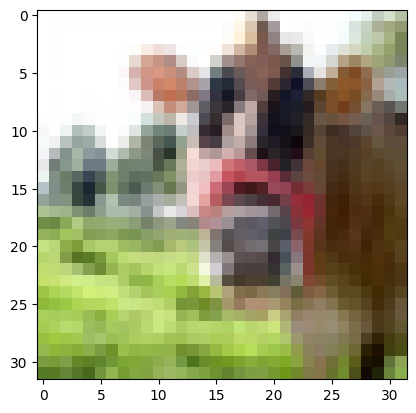

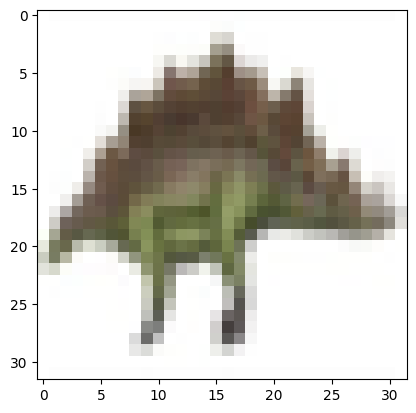

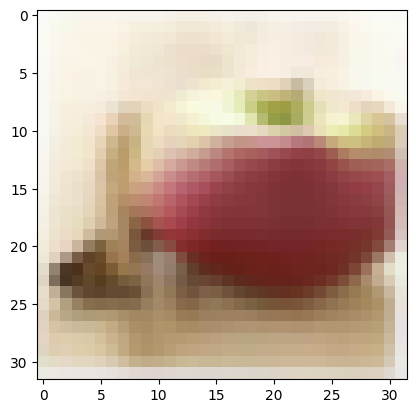

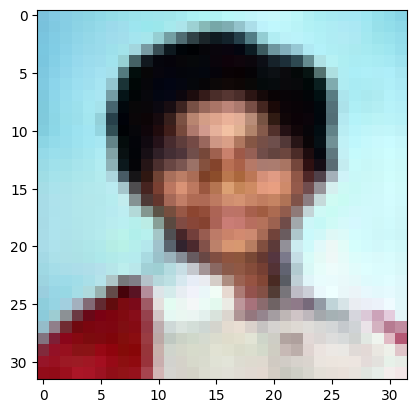

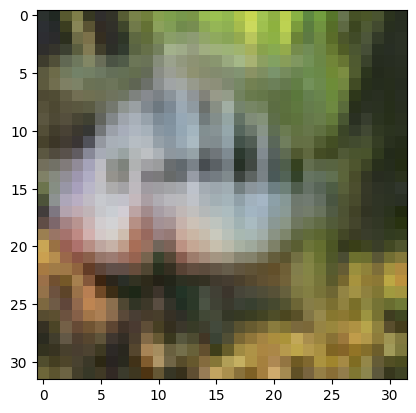

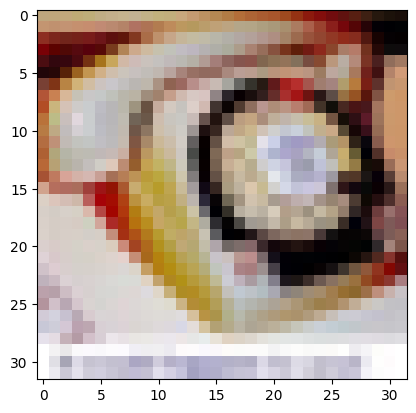

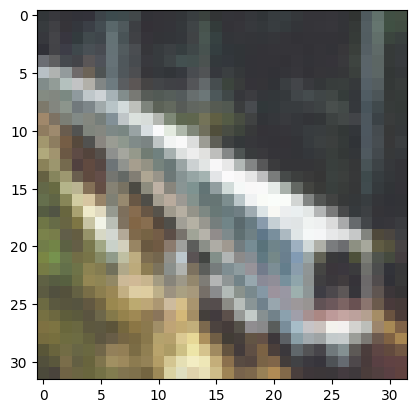

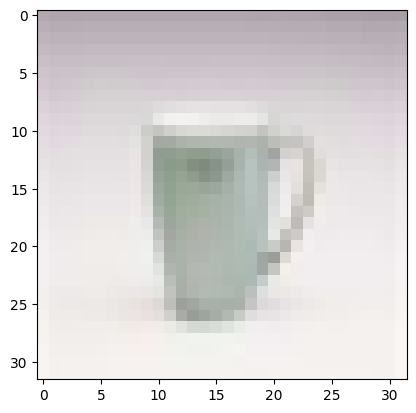

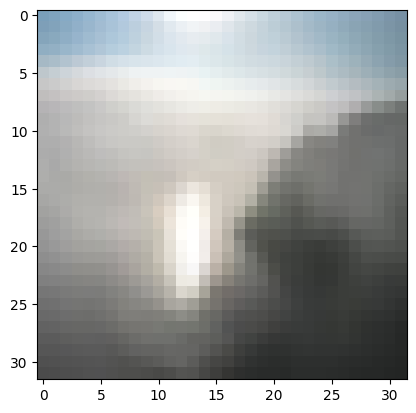

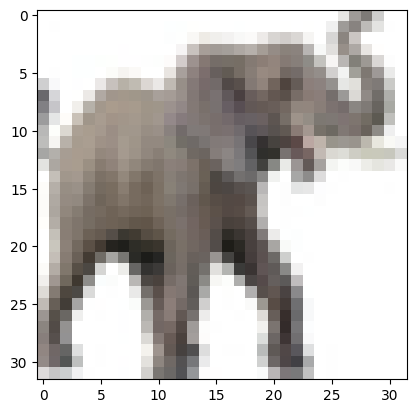

In [ ]:
# Visualize the data by plotting 100 random images, one each for the 100 classes
# Draw 10 images in one row, 10 rows total
for i in range(10):
  plt.imshow(xtrain[i])
  plt.show()


## CNN Model Creation

(15 points)

In this section, you will write code for the following:

*   Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
*   Print the DL model summary

In [ ]:
# Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
def create_model():
  model = keras.Sequential([

    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape = (32,32,3)),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(100,activation='softmax')

  ])
  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model


In [ ]:
# Print the DL model summary
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

## Training

(15 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training CIFAR-100 data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/", to be used for the testing phase


In [ ]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/"
check_point  = keras.callbacks.ModelCheckpoint(filepath='/content/drive/My Drive/Colab Notebooks/cifar/',save_weights_only=True)


In [ ]:
# Train/fit the DL model using the training CIFAR-100 data
cv_model = model.fit(xtrain,ytrain,
                          batch_size= 50,
                          epochs= 100,
                          validation_split= 0.2,
                          callbacks=[check_point])


Epoch 1/100
800/800 [==============================] - 17s 6ms/step - loss: 4.0508 - accuracy: 0.0754 - val_loss: 3.6024 - val_accuracy: 0.1355
Epoch 2/100
800/800 [==============================] - 5s 6ms/step - loss: 3.4012 - accuracy: 0.1783 - val_loss: 3.2639 - val_accuracy: 0.2086
Epoch 3/100
800/800 [==============================] - 4s 5ms/step - loss: 3.0756 - accuracy: 0.2375 - val_loss: 3.0460 - val_accuracy: 0.2459
Epoch 4/100
800/800 [==============================] - 4s 5ms/step - loss: 2.8491 - accuracy: 0.2826 - val_loss: 2.9354 - val_accuracy: 0.2633
Epoch 5/100
800/800 [==============================] - 5s 6ms/step - loss: 2.6452 - accuracy: 0.3216 - val_loss: 2.7867 - val_accuracy: 0.2968
Epoch 6/100
800/800 [==============================] - 4s 5ms/step - loss: 2.4920 - accuracy: 0.3552 - val_loss: 2.6785 - val_accuracy: 0.3220
Epoch 7/100
800/800 [==============================] - 4s 5ms/step - loss: 2.3521 - accuracy: 0.3832 - val_loss: 2.6562 - val_accuracy: 0.327

Test loss: 151.01112365722656 / Test accuracy: 17.800000309944153


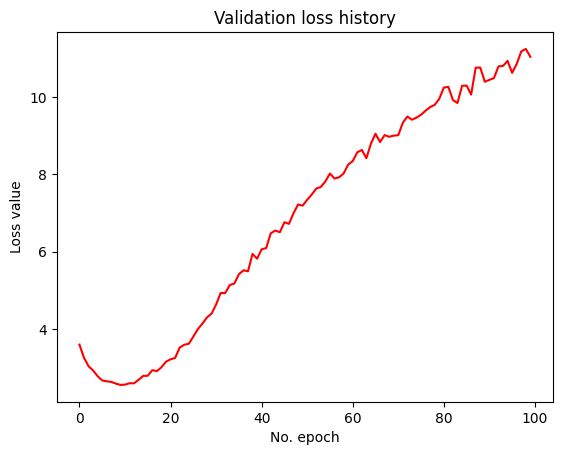

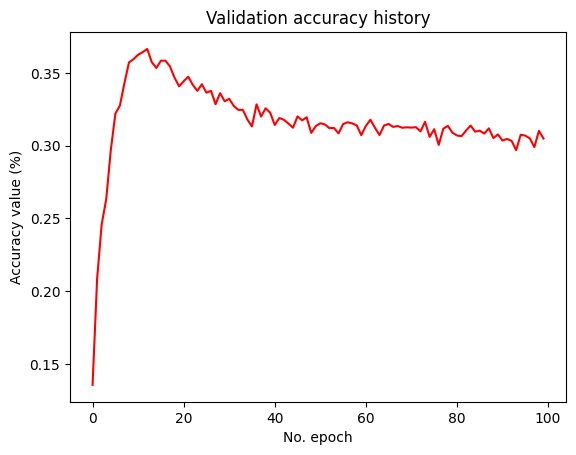

In [ ]:
# Plot the training/validation accuracy and loss
score = model.evaluate(xtest, ytest, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]*100}')

# Visualize history
# Plot history: Loss
plt.plot(cv_model.history['val_loss'], color='red', label='Validation Loss')
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(cv_model.history['val_accuracy'], color='red', label='Validation Accuracy')
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()


## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/cifar/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the CIFAR-100 test dataset. Accuracy value should be printed. Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

This section of the code should be able to run independently from the **training** section, i.e. run this section directly after creating the model.

In [ ]:
# Re-initialize the model
model = create_model()

In [ ]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/cifar/"
model.load_weights('/content/drive/My Drive/Colab Notebooks/cifar/')

In [ ]:
# Evaluate the trained DL model on the CIFAR-100 test dataset
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 151.0111 - accuracy: 0.1780


[151.01112365722656, 0.17800000309944153]

# Natural Language Processing - RNN

The goal of this task is to get hands-on experience in developing, training and testing **Recurrent Neural Network** for the Natural Language Processing task of Sentiment Analysis / Text Classification. In this part, you will work with the well-known **Reuters newswire classification dataset**. The dataset consists of newswires from Reuters, labeled over 46 topics. More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection) or [here](https://keras.io/api/datasets/reuters/). The Keras dataset is a cleaned and organized version of the original dataset and consists of 11,228 newswires (8982 training and 2246 testing). The goal is to classify a newswire into one of the 46 output catergories.


## Load/Prepare Data

(15 points)

In this section, you will write code for the following:

*   Load the Reuters dataset - use the Keras version
 *   Select the vocabulary size while loading the data
 *   The data will be loaded as integer representations for each word
*   Prepare the data to be used for the next steps
 *   Each data entry (newswire) can be of different lengths
 *   Make each newswire consistent - same number of words
 *   'Pad' words (say 0) to get to the standard length or remove words

In [ ]:
# Load the Reuters dataset - use the Keras version
#   Select the vocabulary size while loading the data
vocab_size = 10000
#   The data will be loaded as integer representations for each word
(input_train, y_train), (input_test, y_test) = keras.datasets.reuters.load_data(num_words=vocab_size)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
# Prepare the data to be used for the next steps
#   Each data entry (newswire) can be of different lengths
#   Make each newswire consistent - same number of words
#   'Pad' words (say 0) to get to the standard length or remove words
input_train = keras.preprocessing.sequence.pad_sequences(input_train, maxlen=500)
input_test = keras.preprocessing.sequence.pad_sequences(input_test, maxlen=500)

print(len(input_train[0]))
print(len(input_test[0]))

500
500


In [ ]:
one_hot_train_labels = keras.utils.to_categorical(y_train)
one_hot_test_labels = keras.utils.to_categorical(y_test)

#train test
partial_x_train = input_train

partial_y_train = one_hot_train_labels

#train test
x_test = input_test

y_test = one_hot_test_labels

## RNN Model Creation

(15 points)

In this section, you will write code for the following:

*   Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
*   Print the DL model summary

In [ ]:
# Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU

def create_model_rnn():
  model = keras.Sequential([
          keras.layers.Embedding(10000, 100),
          keras.layers.SimpleRNN(32, return_sequences=True),
          keras.layers.SimpleRNN(32, return_sequences=True),
          keras.layers.SimpleRNN(32, return_sequences=True),
          keras.layers.LSTM(32),
          keras.layers.Dropout(0.5),
          keras.layers.Dense(46,activation='softmax')

  ])
  model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
  return model

In [ ]:
# Print the DL model summary
model = create_model_rnn()
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         1000000   
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 32)          4256      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 46)               

## Training

(15 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training Reuters data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load)), to be used for the testing phase


In [ ]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/"
check_point_nlp = keras.callbacks.ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/reuters/", save_weights_only=True)


In [ ]:
# Train/fit the DL model using the training Reuters data
history = model.fit(partial_x_train,partial_y_train ,
                        epochs=20,
                        batch_size=128,
                        validation_split=0.2)


Epoch 1/20
57/57 [==============================] - 111s 2s/step - loss: 2.8417 - acc: 0.3511 - val_loss: 2.1680 - val_acc: 0.4897
Epoch 2/20
57/57 [==============================] - 105s 2s/step - loss: 2.1997 - acc: 0.4704 - val_loss: 2.0052 - val_acc: 0.4819
Epoch 3/20
57/57 [==============================] - 101s 2s/step - loss: 1.9825 - acc: 0.4981 - val_loss: 2.0062 - val_acc: 0.5092
Epoch 4/20
57/57 [==============================] - 104s 2s/step - loss: 1.8089 - acc: 0.5250 - val_loss: 1.8566 - val_acc: 0.5192
Epoch 5/20
57/57 [==============================] - 101s 2s/step - loss: 1.6399 - acc: 0.5685 - val_loss: 1.8015 - val_acc: 0.5520
Epoch 6/20
57/57 [==============================] - 101s 2s/step - loss: 1.5900 - acc: 0.5883 - val_loss: 1.8973 - val_acc: 0.5337
Epoch 7/20
57/57 [==============================] - 103s 2s/step - loss: 1.4473 - acc: 0.6195 - val_loss: 1.8130 - val_acc: 0.5364
Epoch 8/20
57/57 [==============================] - 100s 2s/step - loss: 1.3623 - a

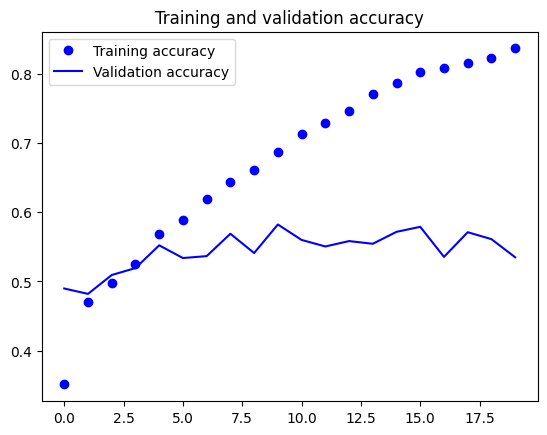

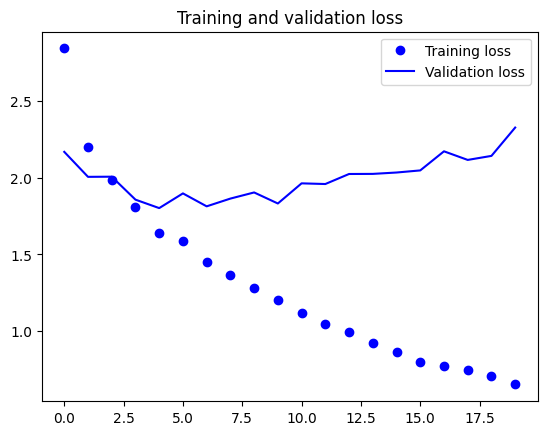

In [ ]:
# Plot the training/validation accuracy and loss

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

final model

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
model.fit(partial_x_train, partial_y_train,
          epochs=5, batch_size=128, validation_split=.2,callbacks=[check_point_nlp])


Epoch 1/5
57/57 [==============================] - 111s 2s/step - loss: 0.6599 - acc: 0.8322 - val_loss: 2.3732 - val_acc: 0.5454
Epoch 2/5
57/57 [==============================] - 104s 2s/step - loss: 0.6154 - acc: 0.8430 - val_loss: 2.3314 - val_acc: 0.5593
Epoch 3/5
57/57 [==============================] - 101s 2s/step - loss: 0.5990 - acc: 0.8469 - val_loss: 2.2372 - val_acc: 0.5771
Epoch 4/5
57/57 [==============================] - 101s 2s/step - loss: 0.5535 - acc: 0.8580 - val_loss: 2.5141 - val_acc: 0.4891
Epoch 5/5
57/57 [==============================] - 103s 2s/step - loss: 0.5547 - acc: 0.8597 - val_loss: 2.3124 - val_acc: 0.5771


## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the Reuters test dataset. Accuracy value should be printed.

This section of the code should be able to run independently from the **training** section, i.e., run this section directly after creating the model.

In [ ]:
# Re-initialize the model
model = create_model_rnn()


In [ ]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/reuters/"
model.load_weights("/content/drive/My Drive/Colab Notebooks/reuters/")


In [ ]:
# Evaluate the trained DL model on the Reuters test dataset
model.evaluate(x_test,y_test)

71/71 [==============================] - 12s 147ms/step - loss: 2.3502 - acc: 0.5690


[2.3502275943756104, 0.5690115690231323]

# Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Download and zip the folders "/content/drive/My Drive/Colab Notebooks/cifar/" (abc123_cifar_model.zip) and "/content/drive/My Drive/Colab Notebooks/reuters/" (abc123_reuters_model.zip)
4.   Upload the .ipynb file and .zip on Blackboard



## Rubric

*   Computer Vision - CNN
    *   (20 points) Load/Prepare Data
    *   (15 points) CNN Model Creation
    *   (15 points) Training
    *   (15 points) Testing/Evaluation
*   Natural Language Processing - RNN
    *   (15 points) Load/Prepare Data
    *   (15 points) RNN Model Creation
    *   (15 points) Training
    *   (15 points) Testing/Evaluation

